# Market Analysis for Pressed Juice Chain in London

In [832]:
#Importing essential Packages
import pandas as pd
import json
import requests
import re
from geopy.geocoders import Nominatim
import codecs
import numpy as np

In [784]:
#List of Boroughs from Wikipedia
co= pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs', encoding='unicode escape')[0]
co.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


## Formatting Co-ordinates

In [785]:
#Formatting Coordinates
new= co['Co-ordinates'].str.split('/ ',1, expand= True)[1]
co['Latitude']= new.str.split(' ',1,expand=True)[0]
co['Longitude']=new.str.split(' ',1,expand=True)[1]
co.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25,﻿51.5607°N,0.1557°E
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31,﻿51.6252°N,0.1517°W
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23,﻿51.4549°N,0.1505°E
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12,﻿51.5588°N,0.2817°W
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20,﻿51.4039°N,0.0198°E


In [607]:
lats=[]
lngs=[]
bors=[]
for lat,lng,bor in zip(co['Latitude'],co['Longitude'],co['Borough']):
    lats.append(re.sub(r'[^\w][N]','',lat))
    lngs.append(re.sub(r'[^\w][E|W]','',lng))
    bors.append(re.sub(r'([\W]note [\d][\W])','',bor))

co['Latitude']= lats
co['Longitude']=lngs
co['Borough']=bors
co.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map,Latitude,Longitude
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25,﻿51.5607,0.1557
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31,﻿51.6252,0.1517
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23,﻿51.4549,0.1505
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12,﻿51.5588,0.2817
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20,﻿51.4039,0.0198


In [366]:
lat=[]
long=[]
for i,j in zip(range(len(co['Latitude'])),range(len(co['Longitude']))):
    lat.append(re.sub(r'([\ufeff])','' ,co['Latitude'][i]))
    long.append(re.sub(r'([\ufeff])','' ,co['Longitude'][i]))
latitude=lat
longitude=long


**This co-ordinates doesn't seem very accurate so we'll get the accuarte coordinates using Google API**

In [786]:
def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]

In [ ]:
api_key= 'google api'
address=  co['Borough'].astype(str) + ', London, United Kingdom'
coordinates=[]
for a,b in zip(address,co['Borough']):
    coordinates.append([b,get_coordinates(api_key,a)])

In [787]:
co_ord=pd.DataFrame(coordinates)
co_ord[['Latitude','Longitude']]=pd.DataFrame(co_ord[1].values.tolist(),index=co_ord.index)
co_ord.drop(1,1,inplace=True)
co_ord.columns=['Borough','Latitude','Longitude']
co_ord.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.546483,0.129350
1,Barnet,51.625149,-0.152936
2,Bexley,51.451902,0.117179
3,Brent,51.567281,-0.271057
4,Bromley,51.406025,0.013156


In [789]:
df=pd.read_csv('/Users/nikhilshah/Downloads/london-borough-profiles.csv', encoding = 'unicode escape')
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


**Reading the London Borough profile file from https://data.london.gov.uk/dataset/london-borough-profiles**

In [790]:
# Subset of relevant variables
df= df[['Area_name','People_aged_17+_with_diabetes_(%)','Childhood_Obesity_Prevalance_(%)_2015/16','Anxiety_score_2011-14_(out_of_10)', 'Happiness_score_2011-14_(out_of_10)',
      'Female_life_expectancy,_(2012-14)','Male_life_expectancy,_(2012-14)','Total_carbon_emissions_(2014)','Two-year_business_survival_rates_(started_in_2013)',
       'Jobs_Density,_2015','Gross_Annual_Pay,_(2016)','Employment_rate_(%)_(2015)','Average_Age,_2017','Population_density_(per_hectare)_2017']]
df.head()

,Area_name,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),"Female_life_expectancy,_(2012-14)","Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017
0,City of London,2.6,NaN,5.6,6.0,.,.,1036,64.3,84.3,.,64.6,43.2,30.3
1,Barking and Dagenham,7.3,28.5,3.1,7.1,82.1,77.6,644,73.0,0.5,27886,65.8,32.9,57.9
2,Barnet,6.0,20.7,2.8,7.4,85.1,82.1,1415,73.8,0.7,33443,68.5,37.3,44.9
3,Bexley,6.9,22.7,3.3,7.2,84.4,80.4,975,73.5,0.6,34350,75.1,39.0,40.3
4,Brent,7.9,24.3,2.9,7.2,85.1,80.1,1175,74.4,0.6,29812,69.5,35.6,76.8


In [793]:
df.rename(columns={'Area_name':'Borough'},inplace= True)
df.head()

,Borough,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),"Female_life_expectancy,_(2012-14)","Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017
0,City of London,2.6,NaN,5.6,6.0,.,.,1036,64.3,84.3,.,64.6,43.2,30.3
1,Barking and Dagenham,7.3,28.5,3.1,7.1,82.1,77.6,644,73.0,0.5,27886,65.8,32.9,57.9
2,Barnet,6.0,20.7,2.8,7.4,85.1,82.1,1415,73.8,0.7,33443,68.5,37.3,44.9
3,Bexley,6.9,22.7,3.3,7.2,84.4,80.4,975,73.5,0.6,34350,75.1,39.0,40.3
4,Brent,7.9,24.3,2.9,7.2,85.1,80.1,1175,74.4,0.6,29812,69.5,35.6,76.8


**Joined both table in one**

In [794]:
london= df.join(co_ord.set_index('Borough'), on= 'Borough', how='left')
london.head()

,Borough,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),"Female_life_expectancy,_(2012-14)","Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017,Latitude,Longitude
0,City of London,2.6,NaN,5.6,6.0,.,.,1036,64.3,84.3,.,64.6,43.2,30.3,NaN,NaN
1,Barking and Dagenham,7.3,28.5,3.1,7.1,82.1,77.6,644,73.0,0.5,27886,65.8,32.9,57.9,NaN,NaN
2,Barnet,6.0,20.7,2.8,7.4,85.1,82.1,1415,73.8,0.7,33443,68.5,37.3,44.9,51.625149,-0.152936
3,Bexley,6.9,22.7,3.3,7.2,84.4,80.4,975,73.5,0.6,34350,75.1,39.0,40.3,51.451902,0.117179
4,Brent,7.9,24.3,2.9,7.2,85.1,80.1,1175,74.4,0.6,29812,69.5,35.6,76.8,51.567281,-0.271057


In [795]:
#London has only 32 boroughs, rest are not so need to remove
london=london[1:33]
london.shape

(32, 16)

In [797]:
#Filling up null values of co-ordinates 
london.iloc[0,14:16]=[51.546483,0.129350]
london.iloc[9,14:16]=[51.493367,0.009821]
london.iloc[11,14:16]=[51.499016,-0.229150]

**Need to convert most of the variables in numericals which are in string data type**

In [798]:
london[['People_aged_17+_with_diabetes_(%)','Childhood_Obesity_Prevalance_(%)_2015/16','Anxiety_score_2011-14_(out_of_10)', 'Happiness_score_2011-14_(out_of_10)',
      'Female_life_expectancy,_(2012-14)','Male_life_expectancy,_(2012-14)','Total_carbon_emissions_(2014)','Two-year_business_survival_rates_(started_in_2013)',
       'Jobs_Density,_2015','Gross_Annual_Pay,_(2016)','Employment_rate_(%)_(2015)','Average_Age,_2017','Population_density_(per_hectare)_2017']]=london[['People_aged_17+_with_diabetes_(%)','Childhood_Obesity_Prevalance_(%)_2015/16','Anxiety_score_2011-14_(out_of_10)', 'Happiness_score_2011-14_(out_of_10)',
      'Female_life_expectancy,_(2012-14)','Male_life_expectancy,_(2012-14)','Total_carbon_emissions_(2014)','Two-year_business_survival_rates_(started_in_2013)',
       'Jobs_Density,_2015','Gross_Annual_Pay,_(2016)','Employment_rate_(%)_(2015)','Average_Age,_2017','Population_density_(per_hectare)_2017']].apply(pd.to_numeric,errors='coerce')

In [799]:
#Fillied up null values with mean
london=london.fillna(london.mean())

In [800]:
london['Gross_Annual_Pay,_(2016)']=round(london['Gross_Annual_Pay,_(2016)'],0)
london.head()

,Borough,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),"Female_life_expectancy,_(2012-14)","Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017,Latitude,Longitude
1,Barking and Dagenham,7.3,28.5,3.1,7.1,82.1,77.6,644,73.0,0.5,27886.0,65.8,32.9,57.9,51.546483,0.129350
2,Barnet,6.0,20.7,2.8,7.4,85.1,82.1,1415,73.8,0.7,33443.0,68.5,37.3,44.9,51.625149,-0.152936
3,Bexley,6.9,22.7,3.3,7.2,84.4,80.4,975,73.5,0.6,34350.0,75.1,39.0,40.3,51.451902,0.117179
4,Brent,7.9,24.3,2.9,7.2,85.1,80.1,1175,74.4,0.6,29812.0,69.5,35.6,76.8,51.567281,-0.271057
5,Bromley,5.2,16.0,3.3,7.4,84.9,81.4,1180,78.6,0.6,37682.0,75.3,40.2,21.8,51.406025,0.013156


## Using Foursquare API##

In [629]:
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605'

In [630]:
#Category Id of Coffee Shops, Cafe, Juice Bar
cat_id= ['4bf58dd8d48988d16d941735','4bf58dd8d48988d1e0931735','4bf58dd8d48988d112941735']

In [643]:
def getnearbyjuice(names,latitude,longitude, cat_id):
    
    place_list=[]
    for cat in cat_id:
        
        for name, lat, long in zip(names,latitude, longitude):
                print(name)
    
                url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                lat,
                long,
                cat
                )
            
                results= requests.get(url).json()['response']['groups'][0]['items']
    
                place_list.append([(
                name,
                lat,
                long,
                v['venue']['id'],
                v['venue']['name'],
                v['venue']['location']['lat'],
                v['venue']['location']['lng'],
                v['venue']['location']['distance'],
                v['venue']['categories'][0]['name']) for v in results])
             
            
    places_df= pd.DataFrame([item for place in place_list for item in place])
    places_df.columns=['Borough',
            'Borough latitude',
            'Borough longitude',
            'Place id',
            'Place',
            'Place Latitude',
            'Place Longitude',
            'Place Distance',
            'Place Category']

    
    return(places_df)

In [644]:
ju_london=getnearbyjuice(london['Borough'],london['Latitude'],london['Longitude'],cat_id)
ju_london.head()

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
To

,Borough,Borough latitude,Borough longitude,Place id,Place,Place Latitude,Place Longitude,Place Distance,Place Category
0,Barking and Dagenham,51.5607,0.1557,5204ee67498ea669a8c61c94,Nes' Cafe,51.563385,0.217272,4271,Café
1,Barking and Dagenham,51.5607,0.1557,55f802e6498ef0f83e1732e0,Patisserie Valerie,51.576447,0.179966,2427,Café
2,Barking and Dagenham,51.5607,0.1557,4d21d2982eb1f04dbb34fbc1,Teapot Cafe,51.579782,0.182306,2810,Café
3,Barking and Dagenham,51.5607,0.1557,4d590421296d54810a1354b1,Cafe Bueno,51.578344,0.180143,2591,Café
4,Barking and Dagenham,51.5607,0.1557,4b618fc8f964a520bd172ae3,The Larder,51.579118,0.025160,9262,Café


In [803]:
ju_london.shape

(1254, 9)

**Need to remove duplicates**

In [646]:
rep_cafe=pd.unique(ju_london['Place id'])
dup_list=[]
for dup,i in zip(rep_cafe, range(len(rep_cafe))):
        
    dup_list.append(ju_london[ju_london['Place id']==dup].iloc[0,:])

ju_london= pd.DataFrame(dup_list)
ju_london.head()

,Borough,Borough latitude,Borough longitude,Place id,Place,Place Latitude,Place Longitude,Place Distance,Place Category
0,Barking and Dagenham,51.5607,0.1557,5204ee67498ea669a8c61c94,Nes' Cafe,51.563385,0.217272,4271,Café
1,Barking and Dagenham,51.5607,0.1557,55f802e6498ef0f83e1732e0,Patisserie Valerie,51.576447,0.179966,2427,Café
2,Barking and Dagenham,51.5607,0.1557,4d21d2982eb1f04dbb34fbc1,Teapot Cafe,51.579782,0.182306,2810,Café
3,Barking and Dagenham,51.5607,0.1557,4d590421296d54810a1354b1,Cafe Bueno,51.578344,0.180143,2591,Café
4,Barking and Dagenham,51.5607,0.1557,4b618fc8f964a520bd172ae3,The Larder,51.579118,0.025160,9262,Café


In [805]:
ju_london=ju_london[ju_london['Place Category'].isin(['Café','Coffee Shop','Juice Bar'])].reset_index()

In [807]:
ju_london.drop('index',axis=1,inplace=True)
ju_london

,Borough,Borough latitude,Borough longitude,Place id,Place,Place Latitude,Place Longitude,Place Distance,Place Category
0,Barking and Dagenham,51.560700,0.155700,5204ee67498ea669a8c61c94,Nes' Cafe,51.563385,0.217272,4271,Café
1,Barking and Dagenham,51.560700,0.155700,55f802e6498ef0f83e1732e0,Patisserie Valerie,51.576447,0.179966,2427,Café
2,Barking and Dagenham,51.560700,0.155700,4d21d2982eb1f04dbb34fbc1,Teapot Cafe,51.579782,0.182306,2810,Café
3,Barking and Dagenham,51.560700,0.155700,4d590421296d54810a1354b1,Cafe Bueno,51.578344,0.180143,2591,Café
4,Barking and Dagenham,51.560700,0.155700,4b618fc8f964a520bd172ae3,The Larder,51.579118,0.025160,9262,Café
5,Barking and Dagenham,51.560700,0.155700,557c3971498ec5857dd9bdf4,Plumstead Pantry,51.481712,0.083707,10108,Café
6,Barking and Dagenham,51.560700,0.155700,5336e689498e3cecfa26c104,The Wanstead Tap,51.555527,0.018714,9498,Café
7,Barking and Dagenham,51.560700,0.155700,5286441f11d22cd8c5a07fbb,Sawmill,51.539367,0.004074,10761,Café
8,Barking and Dagenham,51.560700,0.155700,522c925511d2718df484d53d,Green Owl Café & Deli,51.625312,0.044265,10541,Café
9,Barking and Dagenham,51.560700,0.155700,4cbd71e6f50e224b117604fc,San Marino Cafe,51.568568,0.011334,10028,Café


**Getting details of each venue**

In [ ]:
def getvenuedetails(names,venueid):
    
    place_list=[]
    for name, venue in zip(names,venueid):
        print(name)
        
    
        url='https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue,
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        )
        
        results= requests.get(url).json()['response']['venue']
        
        try:
            price=results['price']['tier']
        except KeyError:
            price=0
        try:
            likes=results['likes']['count']
        except KeyError:
            likes=0
        try:
            checkin=results['stats']['checkinsCount']
        except KeyError:
            checkin=0
        try:
            usercount=results['stats']['usersCount']
        except KeyError:
            usercount=0
        try:
            tipcount=results['stats']['tipCount']
        except KeyError:
            tipcount=0
        try:
            visitcount=results['stats']['visitCount']
        except KeyError:
            visitcount=0
        try:
            rating=results['rating']
        except KeyError:
            rating=0
        
        place_list.append([
            name,
            venue,
            price,
            likes,
             checkin,
            usercount,
            tipcount,
            visitcount,
            rating
            ])
            
    places_df= pd.DataFrame(place_list)
    places_df.columns=['Place Name',
            'Place id',
            'price',
            'likes',
            'checkin_count',
            'user_count',
            'tip_count',
            'visit_count',
            'rating'
            ]

    
    return(places_df)


**Because of the constraint of 500 premium calls per day, calls are made in pieces**

In [694]:
exp=getvenuedetails(ju_london['Place'][0:497],ju_london['Place id'][0:497])
exp.head()

Nes' Cafe
Patisserie Valerie
Teapot Cafe
Cafe Bueno
The Larder
Plumstead Pantry
The Wanstead Tap
Sawmill
Green Owl Café & Deli
San Marino Cafe
Rial Lifestyle Café
Horizon Patisserie
Morrisons Becontree Heath Cafe
Poppins
North Street Cafe
Romford Cafe
Tasty Cafe
Cafe Chateau
Oak Tree Cafe
The Retailery
Cafe Fino
Pret A Manger
Green Lanes Cafe.
The Coffee Lounge
Pret A Manger
Lily's Indulgence
Garden Cafe
Vertigo Lounge
Olive Tree Cafe
Wild Bean Café
Boyden's Kitchen
Em's Coffee
The Step
Chriskitch
Miracles
Owen's Cafe
Michaels
Vero Caffe
Heddons Kitchen
La Dinette
Kiva
Starfish Coffee & Restaurant
Potters Pantry
Dan & DeCarlo
GAIL's Bakery
The Haberdashery
Jacksons Lane
Bites
Hot Pepper Jelly
Crocodile Cafe
Jam In A Jar
The Intrepid Fork
Moka
Beam
Oak Caffe
M's Place
Queens Wood Cafe
Sable d'Or
Local Blend
Tintico
Cafe Nuovo
Kelsey's Farm Shop
Walnuts
Oxleas Wood Cafe
Maggie's Kitchen
GAIL's Bakery
Heap's Sausages
Hand Made Food
Royal Teas
Deptford Greenhouse Cafe
Pistachios In The Par

,Place Name,Place id,price,likes,checkin_count,user_count,tip_count,visit_count,rating
0,Nes' Cafe,5204ee67498ea669a8c61c94,1,6,0,0,4,0,7.7
1,Patisserie Valerie,55f802e6498ef0f83e1732e0,1,4,0,0,1,0,7.0
2,Teapot Cafe,4d21d2982eb1f04dbb34fbc1,1,4,0,0,4,0,6.7
3,Cafe Bueno,4d590421296d54810a1354b1,1,5,0,0,12,0,6.1
4,The Larder,4b618fc8f964a520bd172ae3,1,34,0,0,21,0,7.8


In [808]:
exp2=getvenuedetails(ju_london['Place'][724:726],ju_london['Place id'][724:726])
exp2.head()

Caffè Nero
Costa Coffee


,Place Name,Place id,price,likes,checkin_count,user_count,tip_count,visit_count,rating
0,Caffè Nero,4bf2482e52bda593f078b2b7,1,31,0,0,3,0,7.8
1,Costa Coffee,4fd35258e4b070e01e0656d5,1,26,0,0,2,0,7.5


In [809]:
exp3=getvenuedetails(ju_london['Place'][726:1218],ju_london['Place id'][726:1218])
exp3.head()

Costa Coffee
Starbucks
Hopper & Bean
Costa Coffee
Starbucks
Costa Coffee
Silver Service Cafe
Costa Coffee
Art Cafe
Caffe Doro
Costa Coffee
Muffin Break
Costa Coffee
Costa Coffee
Caffè Nero
The Old Cottage Coffee Shop
Costa Coffee
Starbucks
Nero Express
Starbucks
Costa Coffee
Costa Pronto
Costa Coffee
Costa Coffee
Costa Coffee
Avocado & Coffee
Starbucks
Starbucks
Island Grocer
Craft London
The View Cafe
Caffè Nero
Costa Coffee
Starbucks
Costa Coffee
Star Express
Millennium Cafe
Costa Coffee
Bake Street
Hourglass Coffee
Blighty Tottenham
Camia Italian Delicatessen
L'atelier Dalston
But First Coffee
Starbucks
Costa Coffee
Costa Coffee
Starbucks
Starbucks
Costa Coffee
Costa Coffee
Costa Coffee
Caffè Nero
Costa Coffee
Costa Coffee
Costa Coffee
Patisserie Valerie
Caffè Nero
Caffè Nero
Costa Coffee
Costa Coffee
Costa Coffee
Coffee Station
Forrest Cafè
Velasquez and van Wezel
Nati's on Priory
Beans & Barley
Edith's House
Costa Coffee
Caffè Nero
Common Ground
Caffè Nero
the chocolate room
Costa

,Place Name,Place id,price,likes,checkin_count,user_count,tip_count,visit_count,rating
0,Costa Coffee,4fb3f61de4b0402889d892a1,1,31,0,0,7,0,8.4
1,Starbucks,521b8afb11d2f9bf59234560,1,10,0,0,1,0,7.3
2,Hopper & Bean,59b52c2647f8761788bc2b70,1,5,0,0,3,0,6.6
3,Costa Coffee,542934ef498e4ff3ed17e2f1,1,11,0,0,1,0,6.8
4,Starbucks,4aee3b32f964a5201ed321e3,1,21,0,0,5,0,6.2


In [847]:
exp4=getvenuedetails(ju_london['Place'][497:720],ju_london['Place id'][497:720])
exp4.head()

Patisserie Valerie
Mad Coffee Bar & Delicatessen
Two Magpies Cafe
Husk Coffee
The Pillbox Kitchen
E Pellicci
Hiland
The Larder
Cafe 338
Sam's Cafe
Kahaila
The Hive of Vyner St
Exmouth Coffee
Elbows
Woolidando
Pistachios In The Park
Délice In The Park
Le Delice
Copperfield Cafe
La Cafeteria
Story Coffee
Birdhouse
Ben's Canteen
York Cafe
2Love Tea & Coffee House
Cake Boy
Planet Organic
Hally's
Social Pantry
Caffettino
Pret A Manger
Local Hero
Melanzana
GAIL's Bakery
Cafe Lagu
Il Molino
Il Molino
Doctor Espresso Caffetteria
Megan's
Blåbär
Brew
River Cafe
Bon Bon
Megan’s By The Green
The Hive
Caffe Grana
Pret A Manger
Pimlico Fresh
Coffee Geek and Friends
Sapori Café & Restaurant
Ravello
XLNT
Ole & Steen
The Roasting
Gianni's
Flat Cap Coffee Co
The Wash House Cafe
Royal Institution of Chartered Surveyors (RICS)
Aster
Le Signore Snack Bar
The Rail House Cafe
Pret A Manger
Royal Quarter Café
Pret A Manger
Pret A Manger
Pret A Manger
Pret A Manger
St James's Café
Food Filosophy
The Garden Caf

<bound method NDFrame.head of                         Place Name                  Place id  price  likes  \
0               Patisserie Valerie  4f50e613e4b0c5e1888fe917      1     12   
1    Mad Coffee Bar & Delicatessen  4e5cc0af7d8bfb5e36bb01cc      1      9   
2                 Two Magpies Cafe  5b83fdde872f7d002c51fd90      1      7   
3                      Husk Coffee  4cfe9c0959c7b60c5826a077      1     72   
4              The Pillbox Kitchen  5443c3f0498edf77dae2dc4b      1     18   
5                       E Pellicci  4ad09db8f964a520c7d820e3      1    138   
6                           Hiland  583063260b565605012fa9a3      1      7   
7                       The Larder  4da1bb9db1c937048294d4a1      1     43   
8                         Cafe 338  4b890b21f964a520a61932e3      1    161   
9                       Sam's Cafe  4ad0965af964a52098d820e3      1     46   
10                         Kahaila  4fdb7c38e4b0bdf181f52326      2    328   
11            The Hive of Vyner St

In [849]:
#Whole data about venue details merged together
exp_final= pd.concat([exp,exp2,exp3,exp4], ignore_index=True)
exp_final.shape

(1214, 9)

In [850]:
#Venue and it's details joined together
df= ju_london.join(exp_final.set_index('Place id'), on='Place id', how='right')
df.head()

,Borough,Borough latitude,Borough longitude,Place id,Place,Place Latitude,Place Longitude,Place Distance,Place Category,Place Name,price,likes,checkin_count,user_count,tip_count,visit_count,rating
0,Barking and Dagenham,51.5607,0.1557,5204ee67498ea669a8c61c94,Nes' Cafe,51.563385,0.217272,4271.0,Café,Nes' Cafe,1,6,0,0,4,0,7.7
1,Barking and Dagenham,51.5607,0.1557,55f802e6498ef0f83e1732e0,Patisserie Valerie,51.576447,0.179966,2427.0,Café,Patisserie Valerie,1,4,0,0,1,0,7.0
2,Barking and Dagenham,51.5607,0.1557,4d21d2982eb1f04dbb34fbc1,Teapot Cafe,51.579782,0.182306,2810.0,Café,Teapot Cafe,1,4,0,0,4,0,6.7
3,Barking and Dagenham,51.5607,0.1557,4d590421296d54810a1354b1,Cafe Bueno,51.578344,0.180143,2591.0,Café,Cafe Bueno,1,5,0,0,12,0,6.1
4,Barking and Dagenham,51.5607,0.1557,4b618fc8f964a520bd172ae3,The Larder,51.579118,0.025160,9262.0,Café,The Larder,1,34,0,0,21,0,7.8


In [703]:
df.sum()

Borough              Barking and DagenhamBarking and DagenhamBarkin...
Borough latitude                                               25600.3
Borough longitude                                             -56.1773
Place id             5204ee67498ea669a8c61c9455f802e6498ef0f83e1732...
Place                Nes' CafePatisserie ValerieTeapot CafeCafe Bue...
Place Latitude                                                 25599.1
Place Longitude                                               -61.2967
Place Distance                                                 1772438
Place Category       CaféCaféCaféCaféCaféCaféCaféCaféCaféCaféCaféCa...
Place Name           Nes' CafePatisserie ValerieTeapot CafeCafe Bue...
price                                                              551
likes                                                            22015
checkin_count                                                        0
user_count                                                           0
tip_co

In [851]:
#Dropped variables with zero count 
df.drop(['Place Name','user_count','checkin_count','visit_count'],1,inplace=True)

In [852]:
#Making sure to only have three category in specific
df=df[df['Place Category'].isin(['Café','Coffee Shop','Juice Bar'])]

In [853]:
df['Place Category'].value_counts()

Café           614
Coffee Shop    452
Juice Bar      134
Name: Place Category, dtype: int64

In [889]:
df.head()

,Borough,Borough latitude,Borough longitude,Place id,Place,Place Latitude,Place Longitude,Place Distance,Place Category,price,likes,tip_count,rating
0,Barking and Dagenham,51.5607,0.1557,5204ee67498ea669a8c61c94,Nes' Cafe,51.563385,0.217272,4271.0,Café,1,6,4,7.7
1,Barking and Dagenham,51.5607,0.1557,55f802e6498ef0f83e1732e0,Patisserie Valerie,51.576447,0.179966,2427.0,Café,1,4,1,7.0
2,Barking and Dagenham,51.5607,0.1557,4d21d2982eb1f04dbb34fbc1,Teapot Cafe,51.579782,0.182306,2810.0,Café,1,4,4,6.7
3,Barking and Dagenham,51.5607,0.1557,4d590421296d54810a1354b1,Cafe Bueno,51.578344,0.180143,2591.0,Café,1,5,12,6.1
4,Barking and Dagenham,51.5607,0.1557,4b618fc8f964a520bd172ae3,The Larder,51.579118,0.025160,9262.0,Café,1,34,21,7.8


In [854]:
#onehot encoding
df_onehot= pd.get_dummies(df[['Place Category']],prefix='',prefix_sep='')
df_onehot.head()

,Café,Coffee Shop,Juice Bar
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [855]:
df_onehot= pd.concat([df[['Borough','price','likes','tip_count','rating']],df_onehot], axis=1)
df_onehot.head()

,Borough,price,likes,tip_count,rating,Café,Coffee Shop,Juice Bar
0,Barking and Dagenham,1,6,4,7.7,1,0,0
1,Barking and Dagenham,1,4,1,7.0,1,0,0
2,Barking and Dagenham,1,4,4,6.7,1,0,0
3,Barking and Dagenham,1,5,12,6.1,1,0,0
4,Barking and Dagenham,1,34,21,7.8,1,0,0


In [856]:
#grouped whole data together taking mean values in each borough
df_onehot=df_onehot.groupby('Borough').mean()

In [857]:
df_onehot1= df_onehot.join(london.set_index('Borough'), on='Borough',how='left')
df_onehot1.head()

,price,likes,tip_count,rating,Café,Coffee Shop,Juice Bar,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),...,"Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017,Latitude,Longitude
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,1.013158,16.210526,6.092105,5.818421,0.394737,0.250000,0.355263,7.3,28.5,3.1,...,77.6,644,73.0,0.5,27886.0,65.8,32.9,57.9,51.546483,0.129350
Barnet,1.000000,22.041667,9.270833,7.120833,0.604167,0.250000,0.145833,6.0,20.7,2.8,...,82.1,1415,73.8,0.7,33443.0,68.5,37.3,44.9,51.625149,-0.152936
Bexley,1.054545,17.690909,7.200000,5.756364,0.581818,0.345455,0.072727,6.9,22.7,3.3,...,80.4,975,73.5,0.6,34350.0,75.1,39.0,40.3,51.451902,0.117179
Brent,1.017544,26.614035,10.017544,6.961404,0.508772,0.385965,0.105263,7.9,24.3,2.9,...,80.1,1175,74.4,0.6,29812.0,69.5,35.6,76.8,51.567281,-0.271057
Bromley,1.095238,15.952381,6.023810,6.788095,0.571429,0.380952,0.047619,5.2,16.0,3.3,...,81.4,1180,78.6,0.6,37682.0,75.3,40.2,21.8,51.406025,0.013156


In [821]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

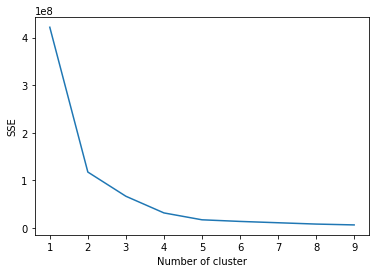

In [858]:
#Finding optimal value of K
kmean_df= df_onehot1.drop(['Latitude','Longitude'],1)
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(kmean_df)
    kmean_df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [859]:
#Performing K-Means clustering 
K_clust= 4
kmean_df= df_onehot1.drop(['Latitude','Longitude'],1)
kmean= KMeans(n_clusters=K_clust, random_state=3).fit(kmean_df)
kmean.labels_[0:10]

array([2, 0, 0, 2, 1, 3, 0, 2, 2, 0], dtype=int32)

In [860]:
#df_onehot1.drop('Cluster',1, inplace= True)
df_onehot1.insert(0, 'Cluster',kmean.labels_)
df_onehot1.head(10)

,Cluster,price,likes,tip_count,rating,Café,Coffee Shop,Juice Bar,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,...,"Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017,Latitude,Longitude
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,2,1.013158,16.210526,6.092105,5.818421,0.394737,0.250000,0.355263,7.3,28.5,...,77.6,644,73.0,0.5,27886.0,65.8,32.9,57.9,51.546483,0.129350
Barnet,0,1.000000,22.041667,9.270833,7.120833,0.604167,0.250000,0.145833,6.0,20.7,...,82.1,1415,73.8,0.7,33443.0,68.5,37.3,44.9,51.625149,-0.152936
Bexley,0,1.054545,17.690909,7.200000,5.756364,0.581818,0.345455,0.072727,6.9,22.7,...,80.4,975,73.5,0.6,34350.0,75.1,39.0,40.3,51.451902,0.117179
Brent,2,1.017544,26.614035,10.017544,6.961404,0.508772,0.385965,0.105263,7.9,24.3,...,80.1,1175,74.4,0.6,29812.0,69.5,35.6,76.8,51.567281,-0.271057
Bromley,1,1.095238,15.952381,6.023810,6.788095,0.571429,0.380952,0.047619,5.2,16.0,...,81.4,1180,78.6,0.6,37682.0,75.3,40.2,21.8,51.406025,0.013156
Camden,3,1.039216,36.823529,13.137255,6.988235,0.549020,0.215686,0.235294,3.9,21.3,...,81.8,1288,73.6,2.2,39796.0,69.2,36.4,111.3,51.551706,-0.158826
Croydon,0,1.066667,12.166667,4.750000,5.630000,0.383333,0.366667,0.250000,6.5,24.5,...,80.3,1237,75.3,0.6,32696.0,75.4,37.0,44.7,51.376165,-0.098234
Ealing,2,1.111111,27.911111,9.266667,7.177778,0.511111,0.400000,0.088889,6.9,23.8,...,80.6,1342,75.8,0.7,31331.0,72.7,36.2,63.3,51.513123,-0.325594
Enfield,2,1.040000,18.120000,5.280000,7.220000,0.400000,0.600000,0.000000,7.0,25.2,...,80.7,1245,74.2,0.6,31603.0,73.0,36.3,41.2,51.663551,-0.104264


In [885]:
df_onehot1.groupby('Cluster').mean()

,price,likes,tip_count,rating,Café,Coffee Shop,Juice Bar,People_aged_17+_with_diabetes_(%),Childhood_Obesity_Prevalance_(%)_2015/16,Anxiety_score_2011-14_(out_of_10),...,"Male_life_expectancy,_(2012-14)",Total_carbon_emissions_(2014),Two-year_business_survival_rates_(started_in_2013),"Jobs_Density,_2015","Gross_Annual_Pay,_(2016)",Employment_rate_(%)_(2015),"Average_Age,_2017",Population_density_(per_hectare)_2017,Latitude,Longitude
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.078493,26.728167,9.815906,6.203524,0.472533,0.430799,0.096668,6.153333,22.626667,3.3000,...,80.393333,1027.800,74.206667,0.733333,33324.000,73.720,36.733333,69.073333,51.497077,-0.100546
1,1.086406,36.290222,12.633945,6.642259,0.565814,0.379635,0.054551,5.220000,20.820000,3.3400,...,80.040000,1049.600,74.200000,1.100000,37344.600,74.040,35.840000,98.240000,51.476828,-0.130366
2,1.047780,25.461422,8.627013,6.722566,0.515335,0.415988,0.068677,6.937500,25.450000,3.1625,...,79.625000,1062.125,73.625000,0.612500,30187.125,70.725,34.887500,68.500000,51.559755,-0.130911
3,1.077778,36.563953,13.215009,7.332531,0.580949,0.307730,0.111321,4.050000,19.525000,3.4500,...,81.500000,1404.500,74.250000,1.975000,41269.250,73.300,36.975000,88.025000,51.491896,-0.195002


In [884]:
clusters=pd.DataFrame(columns=['Variable'])
for i in range(K_clust):
    temp=pd.DataFrame(df_onehot1.groupby('Cluster').mean().iloc[i,:]).reset_index()
    clusters['Variable']=temp['index']
    clusters[i]=temp[i]

clusters    

,Variable,0,1,2,3
0,price,1.078493,1.086406,1.047780,1.077778
1,likes,26.728167,36.290222,25.461422,36.563953
2,tip_count,9.815906,12.633945,8.627013,13.215009
3,rating,6.203524,6.642259,6.722566,7.332531
4,Café,0.472533,0.565814,0.515335,0.580949
5,Coffee Shop,0.430799,0.379635,0.415988,0.307730
6,Juice Bar,0.096668,0.054551,0.068677,0.111321
7,People_aged_17+_with_diabetes_(%),6.153333,5.220000,6.937500,4.050000
8,Childhood_Obesity_Prevalance_(%)_2015/16,22.626667,20.820000,25.450000,19.525000
9,Anxiety_score_2011-14_(out_of_10),3.300000,3.340000,3.162500,3.450000


In [862]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[51.5074, 0.1278], zoom_start=10)
# set color scheme for the clusters
x = np.arange(K_clust)
ys = [i + x + (i*x)**2 for i in range(K_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_onehot1['Latitude'], df_onehot1['Longitude'], df_onehot1.index, df_onehot1['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
display(map_clusters)

In [888]:
list(df_onehot1[df_onehot1['Cluster']==3].index)

['Camden', 'Richmond upon Thames', 'Wandsworth', 'Westminster']